In [1]:
import datetime as dt
import os, sys
import netCDF4 as nc
import matplotlib as mpl
import numpy as np
import numpy.ma as ma
from scipy.spatial import distance
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import cm
import matplotlib.colors as mpl_colors
from matplotlib import rc
from mpl_toolkits.axes_grid1 import make_axes_locatable



from salishsea_tools import geo_tools, viz_tools

get_ipython().magic('matplotlib inline')

In [2]:
fb=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/bathy_downonegrid2.nc')
nav_lon = np.copy(fb.variables['nav_lon'])
nav_lat = np.copy(fb.variables['nav_lat'])
bathy = np.copy(fb.variables['Bathymetry'])
fb.close()
thw = np.loadtxt(
    '/ocean/gsgarbi/MEOPAR/tools/bathymetry/thalweg_working.txt',
    delimiter=" ", dtype=int)

print (thw)
thw_lat = nav_lat[thw[:,0], thw[:,1]]
thw_lon = nav_lon[thw[:,0], thw[:,1]]

[[406   2]
 [406   3]
 [406   4]
 ..., 
 [896  43]
 [896  42]
 [897  42]]


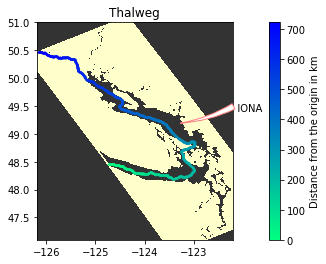

In [25]:
# cmap = plt.get_cmap('Oranges')
# cmap.set_bad('k')

Iona = (-123.30898284912109, 49.187351226806641)
S15 = (-123.3114, 49.130412)
S16 = (-123.317415, 49.1214)
xl=(-126.2,-122.2)
yl=(47.1,51)
plt.clf()
start = dt.datetime.now()


mesh = nc.Dataset("/ocean/gsgarbi/mesh_mask_downbyone2.nc")
tmask=np.copy(mesh.variables['tmask'])
mesh.close()
fb=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/bathy_downonegrid2.nc')
nav_lon=np.copy(fb.variables['nav_lon'])
nav_lat=np.copy(fb.variables['nav_lat'])
fb.close()





fig, axs2 = plt.subplots(1,1,figsize=(5,4))
mesh1=axs2.pcolormesh(nav_lon,nav_lat,np.ma.masked_where(tmask[0,0,:,:]==1,tmask[0,0,:,:]),cmap = 'YlOrRd')
axs2.set_xlim(xl)
axs2.set_ylim(yl)
axs2.patch.set_alpha(0.8)
viz_tools.set_aspect(axs2,coords='map')





el = Ellipse((2, -1), 0.5, 0.5)
axs2.annotate(
        "   IONA",
        xy=(Iona[0], Iona[1]), xytext=(50, 10),
        textcoords='offset points', ha='left', va='bottom', color = 'black',
        arrowprops=dict(arrowstyle="wedge,tail_width=0.6",
                                  fc=(1,1,1), ec=(1., .5, .5),
                                  patchA=None,
                                  patchB=el,
                                  relpos=(0.2, 0.8),
                                  connectionstyle="arc3,rad=-0.1"))

fb=nc.Dataset('/ocean/gsgarbi/revised_notebooks/ncfiles/bathymetry_201702.nc')

distance = geo_tools.distance_along_curve(thw_lon, thw_lat)

x, y = thw_lon, thw_lat
cm = plt.cm.get_cmap('winter_r')

i = 0

cm = 'winter_r'
inv_lon = [thw_lon[-i] for i in range (1, len(thw_lon)+1)]
inv_lat = [thw_lat[-i] for i in range (1, len(thw_lat)+1)]

for x,y in zip(thw_lon, thw_lat):
    


    axs2.scatter(x, y, c = distance [i], s = 0.8, vmin = 0, vmax = distance[-1], cmap = cm)
    i = i + 1


axs2.set_facecolor('black')


axs2.set_title("Thalweg")


div1 = make_axes_locatable(axs2)
cax1 = div1.append_axes('right', '5%', '10%')

sc = axs2.scatter(np.arange(-4, 2), np.arange(-4, 2), c=distance[10:16], cmap=cm,
                    marker='o', s=144, edgecolors='black', vmin=distance[0], vmax=distance[-1])

cb = plt.colorbar(sc, cax=cax1)

cb.set_label("Distance from the origin in km")

fig.savefig("/ocean/gsgarbi/MEOPAR/private-docs/reports/IonaProject/ionafigs/thalweg.png")

Note for self:

Use this

div1 = make_axes_locatable(axs[1])
cax1 = div1.append_axes('right', '5%', '2%')
cb = plt.colorbar(sc, cax=cax1)

In [19]:
print (str(cm))

In [27]:
fb.variables

OrderedDict([('nav_lon', <class 'netCDF4._netCDF4.Variable'>
              float64 nav_lon(y, x)
                  units: degrees_east
                  long_name: longitude
              unlimited dimensions: 
              current shape = (898, 398)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('nav_lat', <class 'netCDF4._netCDF4.Variable'>
              float64 nav_lat(y, x)
                  units: degrees_north
                  long_name: latitude
              unlimited dimensions: 
              current shape = (898, 398)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('Bathymetry', <class 'netCDF4._netCDF4.Variable'>
              float64 Bathymetry(y, x)
                  _FillValue: 0.0
                  least_significant_digit: 0.1
                  units: metres
                  long_name: sea_floor_depth
              unlimited dimensions: 
              current shape = (898, 398)
   